In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.collections import LineCollection
import matplotlib as mpl

import numpy as np
import pandas as pd

In [2]:
#ff1.Cache.enable_cache('../cache')

In [3]:
YEAR = 2024
RACE = 'Brazil'
SESSION = 'R'

session_race = ff1.get_session(YEAR, RACE, SESSION)
weekend = session_race.event
session_race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (734.18 MB) C:\Users\kumar\AppData\Local\Temp\fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control

In [4]:
colormap = mpl.cm.plasma

In [5]:
VER_lap = session_race.laps.pick_driver('VER')

Ver_x, Ver_y = VER_lap.telemetry['X'], VER_lap.telemetry['Y']

C:\Users\kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [6]:
color = VER_lap.telemetry['Speed']

In [7]:
points = np.array([Ver_x, Ver_y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

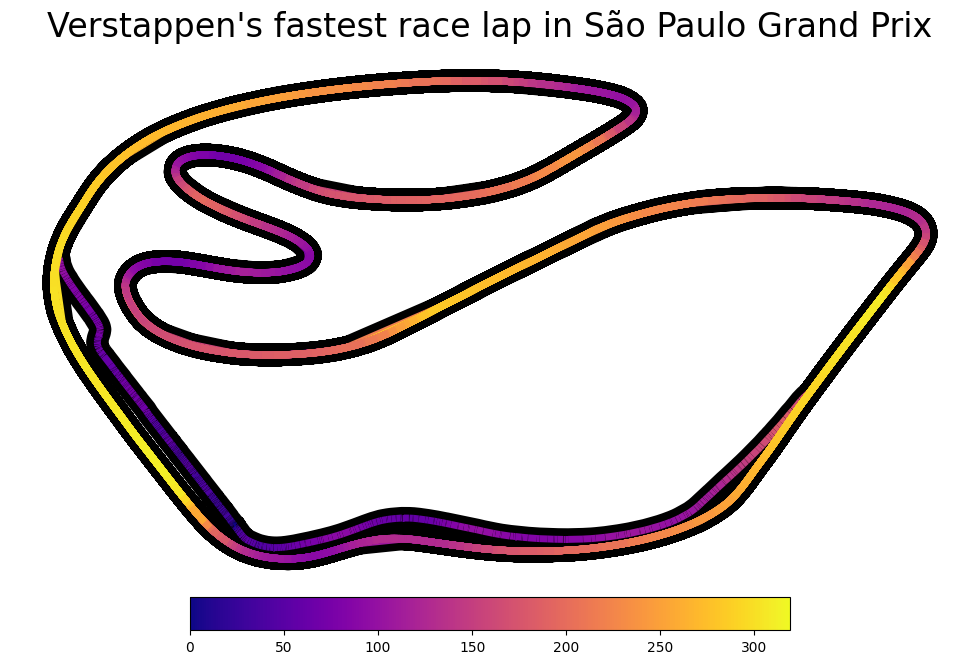

In [8]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f"Verstappen's fastest race lap in {weekend['EventName']}", size=24, y=0.97)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(VER_lap.telemetry['X'], VER_lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

lc.set_array(color)

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")

plt.show()